# Megan Stanwood

## I am interested in the frequency of guardianships and conservatorships in the United States. I am also curious about the progression of guardianships/conservatorships, and how ethics play a role. I am specifically interested in the different court rulings in different states, and through my data analysis, I would like to explore how the states differ in frequency of conservatorships and guardianships.

In [294]:
import pandas as pd

df = pd.read_csv('filing_counts.csv')

DeleteList=['case_action',"for_total","age_group"]
df=df.drop(DeleteList, axis=1)


df.head(10)

,state,year,case_type,count
0,Alaska,2020,G+C+Joint,1171
1,Alaska,2019,G+C+Joint,1084
2,Alaska,2018,G+C+Joint,1227
3,Alaska,2017,G+C+Joint,1090
4,Arizona,2020,Guardianship ONLY,2520
5,Arizona,2020,Guardianship ONLY,2871
6,Arizona,2020,Conservatorship ONLY,3485
7,Arizona,2020,Conservatorship ONLY,1365
8,Arizona,2019,Guardianship ONLY,2383
9,Arizona,2019,Guardianship ONLY,3608


In [295]:
df['year'].mean()

2018.4184210526316

In [296]:
df.shape

(380, 4)

In [297]:
df.nunique(axis=0)
#there are 6 different years that case filings are pulled from: 

state         37
year           6
case_type      4
count        332
dtype: int64

In [298]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,count
count,380.000000,380.000000
mean,2018.418421,1817.150000
std,1.264985,3525.655222
min,2016.000000,0.000000
25%,2017.750000,144.750000
50%,2018.000000,592.500000
75%,2019.000000,2097.000000
max,2021.000000,28004.000000


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   state      380 non-null    object
 1   year       380 non-null    int64 
 2   case_type  380 non-null    object
 3   count      380 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.0+ KB


In [300]:
len(df)

380

In [301]:
list(df.columns)

['state', 'year', 'case_type', 'count']

In [302]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
#Understanding my variables

we can notice from the heatmap that there is a weak negative correlation between year and count


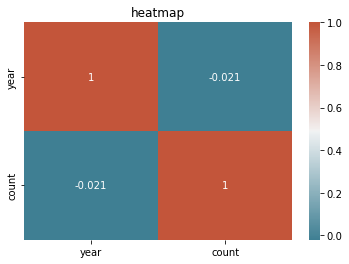

In [303]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)).set(title="heatmap")

print('we can notice from the heatmap that there is a weak negative correlation between year and count')

This categorical scatterplot shows which states had different kinds of ruling. It shows the four different kinds of court rulings on the x axis, and the 37 states on the y axis.


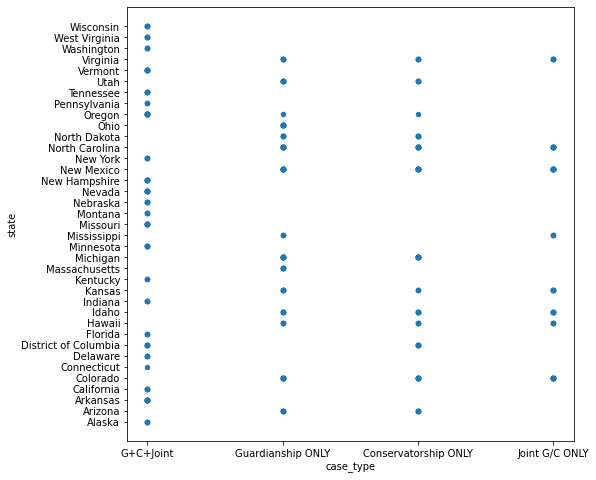

In [304]:
df.plot(kind='scatter', x='case_type', y='state',figsize=(8,8))
print('This categorical scatterplot shows which states had different kinds of ruling. It shows the four different kinds of court rulings on the x axis, and the 37 states on the y axis.') 

this histogram shows the frequency that each year is listed. The histogram isolates one variable and allows it to be studied in more detail. The years are listed on the x axis, and the frequency that they are listed in the dataset is listed on the y axis


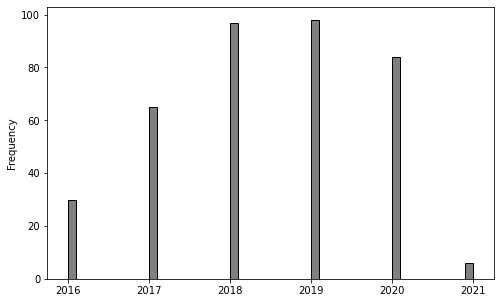

In [305]:
df['year'].plot(kind='hist', bins=50, figsize=(8,5), facecolor='grey',edgecolor='black')
print('this histogram shows the frequency that each year is listed. The histogram isolates one variable and allows it to be studied in more detail. The years are listed on the x axis, and the frequency that they are listed in the dataset is listed on the y axis')

In [306]:
# set identifier "case_type" as string
df['case_type'] = df['case_type'].astype('str')
# set categorical data
df['case_type'] = df['case_type'].astype('category')
df['year'] = df['year'].astype('int64')
df['case_type'] = df['case_type'].astype('category')
df['count'] = df['count'].astype('int64')


Preview of data:


,state,year,case_type,count
0,Alaska,2020,G+C+Joint,1171
1,Alaska,2019,G+C+Joint,1084
2,Alaska,2018,G+C+Joint,1227



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   state      380 non-null    object  
 1   year       380 non-null    int64   
 2   case_type  380 non-null    category
 3   count      380 non-null    int64   
dtypes: category(1), int64(2), object(1)
memory usage: 9.6+ KB
None

***Number of duplicated entries:  7


,state,year,case_type,count
160,Michigan,2018,Conservatorship ONLY,0
164,Michigan,2018,Conservatorship ONLY,0
158,Michigan,2018,Guardianship ONLY,0
162,Michigan,2018,Guardianship ONLY,0
152,Michigan,2019,Conservatorship ONLY,0



To check: 
Unique count of non-numeric data

state        37
case_type     4
dtype: int64
Top 5 unique values of state
            state  Count
0      New Mexico     36
1  North Carolina     30
2        Colorado     30
3        Michigan     24
4           Idaho     18
 
Top 5 unique values of case_type
              case_type  Count
0             G+C+Joint    132
1     Guardianship ONLY    106
2  Conservatorship ONLY     86
3        Joint G/C ONLY     56
 


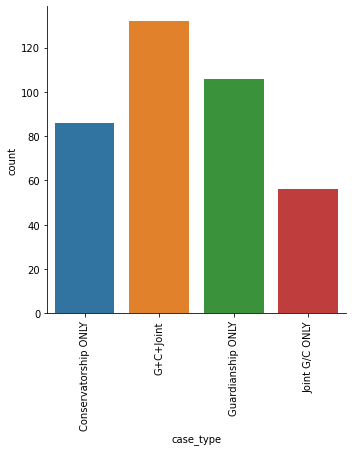

The boxplot demonstrates the frequency of case types listed in the dataset. Predictably, the most commonly listed case type is Guardianship+Conservatorship+Joint, which is the category that includes all types of cases. Of the 50 states, 37 states released records of court rulings.


In [307]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    print("The boxplot demonstrates the frequency of case types listed in the dataset. Predictably, the most commonly listed case type is Guardianship+Conservatorship+Joint, which is the category that includes all types of cases. Of the 50 states, 37 states released records of court rulings.")
    
eda(df)

In [308]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")
    

No. of duplicated entries:  7
        state  year             case_type  count
160  Michigan  2018  Conservatorship ONLY      0
164  Michigan  2018  Conservatorship ONLY      0
158  Michigan  2018     Guardianship ONLY      0
162  Michigan  2018     Guardianship ONLY      0
152  Michigan  2019  Conservatorship ONLY      0


In [309]:
df.drop_duplicates(inplace=True)

In [310]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [311]:
df = df.set_index('state')
df.head()
#setting the index as state makes it a lot easier for me to locate information specific to each stat

,year,case_type,count
state,,,
Alaska,2020,G+C+Joint,1171
Alaska,2019,G+C+Joint,1084
Alaska,2018,G+C+Joint,1227
Alaska,2017,G+C+Joint,1090
Arizona,2020,Guardianship ONLY,2520


In [312]:
df.loc["Washington"]

,year,case_type,count
state,,,
Washington,2020,G+C+Joint,2824
Washington,2019,G+C+Joint,2987
Washington,2018,G+C+Joint,2801
Washington,2017,G+C+Joint,3005


In [330]:
import pandas as pd
def load_and_process(filing_counts):
    df = (pd.read_csv("filing_counts.csv")
          .drop("for_total",axis=1)
          .drop("case_action",axis=1)
          .drop("age_group",axis=1)
          .set_index('state')
          .drop_duplicates(inplace=True)
         )
    return df
df.head()


,year,case_type,count
state,,,
Alaska,2020,G+C+Joint,1171
Alaska,2019,G+C+Joint,1084
Alaska,2018,G+C+Joint,1227
Alaska,2017,G+C+Joint,1090
Arizona,2020,Guardianship ONLY,2520


In [331]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  2
                      year             case_type  count
state                                                  
District of Columbia  2019  Conservatorship ONLY      0
Michigan              2019  Conservatorship ONLY      0
New Mexico            2019  Conservatorship ONLY     30
North Dakota          2019  Conservatorship ONLY     30


In [332]:
df.to_csv("Cleandata2.csv")

# How do the 50 states differ in age groups and case types?
## Analysis Question (Task 4)
### I am interested in the frequency of guardianships and conservatorships in the United States. I am also curious about the progression of guardianships/conservatorships, and how ethics play a role. I am specifically interested in the different court rulings in different states. Through my data analysis



## I am interested in the frequency of guardianships and conservatorships in the United States. I am also curious about the progression of guardianships/conservatorships, and how ethics play a role. I am specifically interested in the different court rulings in different states, and through my data analysis, I would like to explore how the states differ in frequency of conservatorships and guardianships.